In [2]:
import os
import pandas as pd
import numpy as np
import json
import warnings
import scipy.stats as stats
import math

import seaborn as sns
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

In [3]:
cards = pd.read_csv("../data/cards_data.csv")
users = pd.read_csv("../data/users_data.csv")
transactions = pd.read_csv("../data/transactions_data.csv")

In [4]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [5]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1


In [6]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN


In [7]:
def money_to_float(s):
    s = pd.Series(s).astype(str).str.strip()
    s = s.str.replace(r'[$,]', '', regex=True)   
    return pd.to_numeric(s)   

def parse_mmYYYY(s):
    return pd.to_datetime(pd.Series(s).astype(str), format="%m/%Y")

In [8]:
# users: 화폐형 컬럼 숫자화
for c in ["per_capita_income","yearly_income","total_debt"]:
    if c in users.columns:
        users[c] = money_to_float(users[c])

# # 불필요(PII) 최소 제거
# users = users.drop("address", axis=1) 

# 카드 숫자/날짜 변환
cards["credit_limit"] = money_to_float(cards["credit_limit"])
cards["acct_open_date"] = parse_mmYYYY(cards["acct_open_date"])
cards["expires"] = parse_mmYYYY(cards["expires"]) # datime 형태로 변환

# 카드 has_chaip, card_on_dark_web 정보 이진화
for c in ["has_chip","card_on_dark_web"]:
    cards[c] = cards[c].map({"YES":1,"Yes":1,"NO":0,"No":0}).astype('Int8')

# 카드 민감정보 & 값이 하나뿐인 컬럼제거
cards = cards.drop(["card_number", "cvv", 'card_on_dark_web'], axis=1) # 값이 하나뿐인 'card_on_dark_web' 컬럼도 제거 목록에 추가 (sc)

# transactions: 날짜/금액/파생
transactions["date"] = pd.to_datetime(transactions["date"])
transactions['week'] = transactions['date'].dt.to_period('W').dt.start_time # week 정보 추가 (sc)
transactions['month'] = transactions['date'].dt.to_period('M').dt.start_time # month 정보 추가 (sc)
transactions["hour"] = transactions["date"].dt.hour
transactions["dow"]  = transactions["date"].dt.dayofweek

# 음수(환불 등)는 분석 목적에 따라 분리
transactions["amount"] = money_to_float(transactions["amount"])
transactions["amount_pos"] = transactions["amount"].clip(lower=0)
transactions["amount_log1p"] = np.log1p(transactions["amount_pos"])

transactions["is_refund"] = (transactions["amount"] < 0).astype('Int8')
transactions["amount_pos"] = transactions["amount"].clip(lower=0)
transactions["amount_neg"] = transactions["amount"].clip(upper=0) 

# 우편번호 float → 문자열 5자리
transactions["zip"] = transactions["zip"].round().astype('Int64')
transactions["zip_str"] = transactions["zip"].astype("string").str.zfill(5)
transactions.drop(columns='zip', inplace=True, errors='ignore')  # 필요없어진 zip 컬럼 제거 (sc)

# 거의 전부 NaN인 errors 컬럼 제거
transactions = transactions.drop("errors", axis=1) 

In [9]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,week,month,hour,dow,amount_pos,amount_log1p,is_refund,amount_neg,zip_str
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,5499,2009-12-28,2010-01-01,0,4,0.00,0.000000,1,-77.0,58523
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,5311,2009-12-28,2010-01-01,0,4,14.57,2.745346,0,0.0,52722
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,4829,2009-12-28,2010-01-01,0,4,80.00,4.394449,0,0.0,92084
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,4829,2009-12-28,2010-01-01,0,4,200.00,5.303305,0,0.0,46307
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,5813,2009-12-28,2010-01-01,0,4,46.41,3.858833,0,0.0,20776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,5499,2019-10-28,2019-10-01,23,3,1.11,0.746688,0,0.0,91792
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,5815,2019-10-28,2019-10-01,23,3,12.80,2.624669,0,0.0,<NA>
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,4900,2019-10-28,2019-10-01,23,3,40.44,3.724247,0,0.0,75002
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,5411,2019-10-28,2019-10-01,23,3,4.00,1.609438,0,0.0,94014


In [10]:
work = pd.merge(transactions, users, left_on='client_id', right_on='id', how='left', suffixes=('', '__USER'))
work = pd.merge(work, cards, left_on='card_id', right_on='id', how='left', suffixes=('', '__CARD'))

In [11]:
work.drop(columns=['id__USER', 'id__CARD', 'client_id__CARD'], inplace=True, errors='ignore') # 중복 ID 컬럼 삭제

In [12]:
# 1. JSON 파일 불러오기
fraud_label_file_path = '../data/train_fraud_labels.json'

with open(fraud_label_file_path, 'r') as f:
    data = json.load(f)

# 2. target 딕셔너리 추출
target_dict = data['target']

In [13]:
# 'is_raud'에 target 값들 입력
work['is_fraud'] = work['id'].astype(str).map(target_dict)

# fraud_label null일 경우 0으로.
work.dropna(subset=['is_fraud'], inplace=True)

# 사기여부 숫자형으로 매핑
work['is_fraud'] = work['is_fraud'].map({'No': 0, 'Yes': 1}).astype(int)

# 데이터프레임의 사본을 새로운 변수로 저장
work_with_target = work.copy()

In [14]:
work_with_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8914963 entries, 0 to 13305912
Data columns (total 41 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     int64         
 1   date                   datetime64[ns]
 2   client_id              int64         
 3   card_id                int64         
 4   amount                 float64       
 5   use_chip               object        
 6   merchant_id            int64         
 7   merchant_city          object        
 8   merchant_state         object        
 9   mcc                    int64         
 10  week                   datetime64[ns]
 11  month                  datetime64[ns]
 12  hour                   int32         
 13  dow                    int32         
 14  amount_pos             float64       
 15  amount_log1p           float64       
 16  is_refund              Int8          
 17  amount_neg             float64       
 18  zip_str                str

In [15]:
transactions.shape

(13305915, 19)

In [16]:
work_with_target.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'mcc', 'week',
       'month', 'hour', 'dow', 'amount_pos', 'amount_log1p', 'is_refund',
       'amount_neg', 'zip_str', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'address', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'credit_score',
       'num_credit_cards', 'card_brand', 'card_type', 'expires', 'has_chip',
       'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'is_fraud'],
      dtype='object')

In [17]:
##################################################
filepath = '../data/transactions_wtih_target.csv' # ********* 이부분은 본인이 저장하고 싶은 경로 + 파일명 사용!! *******
#################################################


if not os.path.exists(filepath):   # 파일 없을 때만 저장
    work_with_target.to_csv(filepath, index=False)
else:
    print(f'⚠️ 파일 이미 존재: {filepath}, 저장 스킵')

⚠️ 파일 이미 존재: ../data/transactions_wtih_target.csv, 저장 스킵


## EDA - amount가 음수인 사기거래 

In [18]:
# 사기거래의 경우 환불이 된 경우가 있을 수 있다. 금액이 음수인 경우를 추적해보자
work_with_target[(work_with_target.amount_neg !=0) & (work_with_target.is_fraud != 0)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,num_credit_cards,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud
22642,7502469,2010-01-07 19:26:00,126,5497,-339.0,Online Transaction,3558,ONLINE,NaN,3640,...,4,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,1
41604,7525132,2010-01-13 15:43:00,1600,5050,-104.0,Online Transaction,39991,ONLINE,NaN,3771,...,3,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,1
74531,7564371,2010-01-23 21:33:00,1048,2542,-437.0,Online Transaction,59474,ONLINE,NaN,3722,...,4,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,1
96147,7590192,2010-01-30 12:44:00,1019,5112,-450.0,Online Transaction,59474,ONLINE,NaN,3722,...,4,Mastercard,Credit,2023-11-01,1,1,7300,2008-10-01,2010,1
108042,7604364,2010-02-03 00:01:00,771,4986,-138.0,Online Transaction,74934,ONLINE,NaN,3596,...,3,Mastercard,Debit,2023-01-01,1,2,17536,2003-10-01,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13080437,23483325,2019-09-02 14:55:00,74,4027,-301.0,Chip Transaction,59474,Rome,Italy,3722,...,3,Visa,Debit,2022-06-01,1,1,19746,2014-07-01,2014,1
13098338,23505312,2019-09-07 11:06:00,1,4652,-367.0,Swipe Transaction,7777,Rome,Italy,3684,...,3,Visa,Credit,2021-12-01,0,1,12800,2007-09-01,2011,1
13178843,23604739,2019-09-28 12:25:00,944,372,-69.0,Chip Transaction,61195,Rome,Italy,5541,...,6,Mastercard,Debit,2020-05-01,1,2,72274,2018-01-01,2018,1
13281619,23731814,2019-10-25 13:41:00,1843,5834,-382.0,Chip Transaction,32070,Rome,Italy,7011,...,7,Mastercard,Credit,2021-10-01,1,2,4800,2005-12-01,2009,1


In [19]:
work_with_target[(work_with_target.client_id == 126) & (abs(work_with_target.amount) == 339)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,num_credit_cards,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud
9526,7486725,2010-01-03 20:58:00,126,5497,339.0,Online Transaction,3558,ONLINE,NaN,3640,...,4,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,1
22642,7502469,2010-01-07 19:26:00,126,5497,-339.0,Online Transaction,3558,ONLINE,NaN,3640,...,4,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,1


In [20]:
work_with_target[(work_with_target.client_id == 1600) & (abs(work_with_target.amount) == 104)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,num_credit_cards,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud
32204,7513871,2010-01-10 19:44:00,1600,5050,104.0,Online Transaction,39991,ONLINE,NaN,3771,...,3,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,1
41604,7525132,2010-01-13 15:43:00,1600,5050,-104.0,Online Transaction,39991,ONLINE,NaN,3771,...,3,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,1
2127995,10045432,2011-09-09 17:53:00,1600,4251,104.0,Swipe Transaction,59474,Belfair,WA,3722,...,3,Mastercard,Debit,2023-08-01,1,1,48754,2008-08-01,2013,0


In [21]:
work_with_target[(work_with_target.client_id == 1048) & (abs(work_with_target.amount) == 437)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,num_credit_cards,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud
71664,7560966,2010-01-22 23:31:00,1048,2542,437.0,Online Transaction,59474,ONLINE,NaN,3722,...,4,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,1
74531,7564371,2010-01-23 21:33:00,1048,2542,-437.0,Online Transaction,59474,ONLINE,NaN,3722,...,4,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,1


In [22]:
work_with_target[(work_with_target.client_id == 345) & (abs(work_with_target.amount) == 210)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,num_credit_cards,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud
13282707,23733174,2019-10-25 18:53:00,345,3441,210.0,Chip Transaction,49637,Rome,Italy,3509,...,1,Visa,Credit,2024-09-01,1,3,7900,2009-06-01,2009,1
13289605,23741689,2019-10-27 14:49:00,345,3441,-210.0,Chip Transaction,49637,Rome,Italy,3509,...,1,Visa,Credit,2024-09-01,1,3,7900,2009-06-01,2009,1


- 사기 거래 금액이 음수인 경우는 환불된 경우
- 사기거래 count 집계시 중복 집계(사기 거래 피해 + 사기거래 환불로)
- 사기거래 집계에 사용할 거래내역은 금액이 양수인 경우만으로 한정해야한다.

In [23]:
# work_with_target 데이터에서 amount가 음수면서 is_faud는 1인 경우 제외
condition = ~((work_with_target.amount < 0) & (work_with_target.is_fraud == 1))
work_with_target_pos = work_with_target[condition]

# 고객 id별 fraud_count (양수 금액 + 사기)
fraud_counts_pos = (
    work_with_target_pos.groupby('client_id')['is_fraud']
    .sum()  # 고객별 사기 피해 건수
    .reset_index(name='fraud_count')
)

In [24]:
# amount < 0 인 일반 거래는 여전히 dataframe에 남아있음.
work_with_target_pos[work_with_target_pos.amount < 0]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,num_credit_cards,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud
0,7475327,2010-01-01 00:01:00,1556,2972,-77.0,Swipe Transaction,59935,Beulah,ND,5499,...,4,Mastercard,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0
19,7475347,2010-01-01 00:36:00,114,3398,-64.0,Swipe Transaction,61195,North Hollywood,CA,5541,...,4,Mastercard,Debit,2023-07-01,1,2,27447,2008-06-01,2010,0
50,7475382,2010-01-01 01:25:00,1703,2969,-78.0,Swipe Transaction,43293,Grand Junction,CO,5499,...,2,Mastercard,Credit,2022-06-01,1,2,10600,2008-05-01,2019,0
114,7475460,2010-01-01 03:08:00,957,4532,-147.0,Swipe Transaction,44795,Marysville,OH,3780,...,3,Mastercard,Debit,2020-06-01,0,1,27974,2003-09-01,2012,0
249,7475612,2010-01-01 06:11:00,1640,4967,-84.0,Swipe Transaction,61195,Adrian,MI,5541,...,3,Mastercard,Debit,2023-06-01,1,1,14231,2002-10-01,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305660,23761555,2019-10-31 21:12:00,502,3521,-96.0,Swipe Transaction,43293,Ford City,PA,5499,...,2,Mastercard,Debit,2023-07-01,0,1,415,2011-06-01,2013,0
13305780,23761706,2019-10-31 22:13:00,1360,143,-91.0,Chip Transaction,59935,Crestview,FL,5499,...,3,Visa,Credit,2020-08-01,1,1,9000,2007-01-01,2007,0
13305811,23761745,2019-10-31 22:28:00,194,5587,-71.0,Swipe Transaction,59935,Hartford City,IN,5499,...,4,Visa,Debit,2023-03-01,0,2,9080,2009-11-01,2013,0
13305813,23761747,2019-10-31 22:29:00,133,4683,-52.0,Chip Transaction,61195,Marietta,GA,5541,...,2,Mastercard,Debit,2024-03-01,1,1,25197,2008-09-01,2011,0


In [25]:
# 고객 id별 fraud_count (양수 금액 + 음수 금액 + 사기)
fraud_counts_all = (
    work_with_target.groupby('client_id')['is_fraud'] # work_with_target은 음수의 사기거래 금액도 포함
    .sum()  # 고객별 사기 피해 건수
    .reset_index(name='fraud_count')
)

In [26]:
users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1


In [27]:
# 양수 사기 금액만 포함한 경우
users_with_fraud_count_pos = pd.merge(users, fraud_counts_pos, left_on='id', right_on='client_id', how='left')
users_with_fraud_count_pos.drop(columns='client_id', inplace=True, errors=True)

In [28]:
# 음수 사기 금액도 포함한 경우
users_with_fraud_count = pd.merge(users, fraud_counts_all, left_on='id', right_on='client_id', how='left')
users_with_fraud_count.drop(columns='client_id', inplace=True, errors=True)

In [29]:
temp_data = users_with_fraud_count_pos.copy().dropna(subset='fraud_count')
temp_data['fraud_risk'] = (temp_data['fraud_count'] > 5).astype(int)
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 0 to 1997
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1219 non-null   int64  
 1   current_age        1219 non-null   int64  
 2   retirement_age     1219 non-null   int64  
 3   birth_year         1219 non-null   int64  
 4   birth_month        1219 non-null   int64  
 5   gender             1219 non-null   object 
 6   address            1219 non-null   object 
 7   latitude           1219 non-null   float64
 8   longitude          1219 non-null   float64
 9   per_capita_income  1219 non-null   int64  
 10  yearly_income      1219 non-null   int64  
 11  total_debt         1219 non-null   int64  
 12  credit_score       1219 non-null   int64  
 13  num_credit_cards   1219 non-null   int64  
 14  fraud_count        1219 non-null   float64
 15  fraud_risk         1219 non-null   int64  
dtypes: float64(3), int64(11), obj

In [30]:
# users 데이터에 fraud_count 추가 완료 확인
users_with_fraud_count_pos.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_count
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,9.0
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5,21.0
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,30.0
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4,8.0
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1,0.0


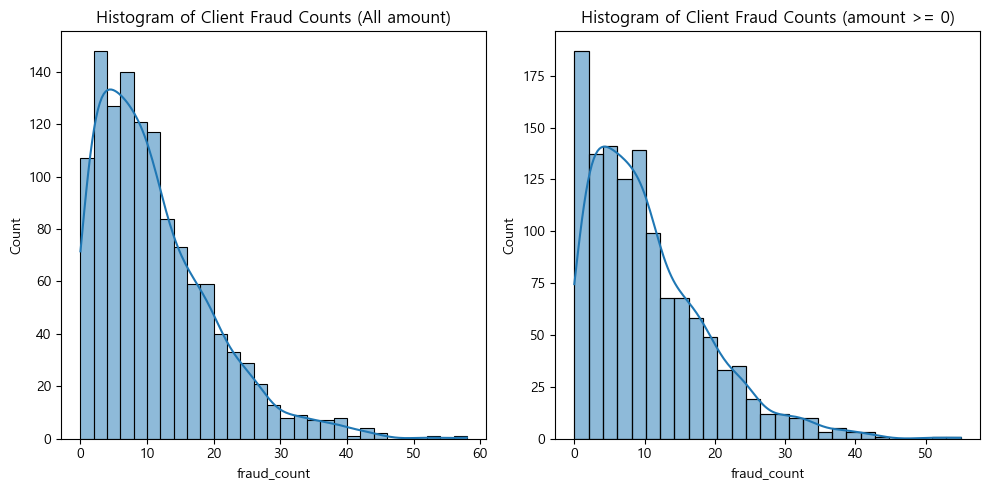

In [31]:
plt.figure(figsize=(10, 5)) 

# amount 음수도 포함
plt.subplot(121)  # 1행 2열 중 1번째
sns.histplot(users_with_fraud_count.fraud_count, kde=True)
plt.title('Histogram of Client Fraud Counts (All amount)')

# amount 양수만
plt.subplot(122)  # 1행 2열 중 2번째
sns.histplot(users_with_fraud_count_pos.fraud_count, kde=True)
plt.title('Histogram of Client Fraud Counts (amount >= 0)')

plt.tight_layout()

figure_name = 'comparison_w_or_wo_negAmount'
os.makedirs('figures', exist_ok=True)
plt.savefig(f'figures/{figure_name}')

plt.show()

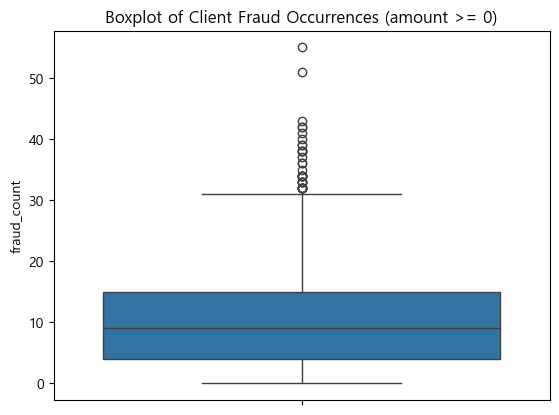

In [32]:
sns.boxplot(users_with_fraud_count_pos.fraud_count)
plt.title('Boxplot of Client Fraud Occurrences (amount >= 0)')

figure_name = 'distribution_fraud_count'
os.makedirs('figures', exist_ok=True)
plt.savefig(f'figures/{figure_name}')

plt.show()

In [33]:
users_with_fraud_count.fraud_count.describe()

count    1219.000000
mean       10.936833
std         8.698571
min         0.000000
25%         4.000000
50%         9.000000
75%        15.000000
max        58.000000
Name: fraud_count, dtype: float64

In [34]:
users_with_fraud_count_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   int64  
 10  yearly_income      2000 non-null   int64  
 11  total_debt         2000 non-null   int64  
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
 14  fraud_count        1219 non-null   float64
dtypes: float64(3), int64(10), object(2)
memory usage: 234.5+ KB


In [35]:
users_with_fraud_count_pos['fraud_risk'] = np.where(users_with_fraud_count_pos['fraud_count']>5, 1, 0)

In [36]:
users_with_fraud_count_pos.dropna(subset='fraud_count', inplace=True)

In [37]:
users_with_fraud_count_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 0 to 1997
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1219 non-null   int64  
 1   current_age        1219 non-null   int64  
 2   retirement_age     1219 non-null   int64  
 3   birth_year         1219 non-null   int64  
 4   birth_month        1219 non-null   int64  
 5   gender             1219 non-null   object 
 6   address            1219 non-null   object 
 7   latitude           1219 non-null   float64
 8   longitude          1219 non-null   float64
 9   per_capita_income  1219 non-null   int64  
 10  yearly_income      1219 non-null   int64  
 11  total_debt         1219 non-null   int64  
 12  credit_score       1219 non-null   int64  
 13  num_credit_cards   1219 non-null   int64  
 14  fraud_count        1219 non-null   float64
 15  fraud_risk         1219 non-null   int64  
dtypes: float64(3), int64(11), obj

In [38]:
users_with_fraud_count_pos.to_csv('users_prep.csv')

In [39]:
len(users_with_fraud_count_pos) - users_with_fraud_count_pos.fraud_count.isna().sum()

np.int64(1219)

In [40]:
# 각 사기 카운트 비율
users_with_fraud_count_pos.fraud_count.value_counts().sort_index()

fraud_count
0.0     26
1.0     82
2.0     79
3.0     76
4.0     61
5.0     73
6.0     68
7.0     72
8.0     53
9.0     71
10.0    68
11.0    52
12.0    47
13.0    29
14.0    39
15.0    34
16.0    34
17.0    32
18.0    26
19.0    33
20.0    16
21.0    22
22.0    11
23.0    15
24.0    20
25.0    13
26.0     6
27.0     6
28.0     6
29.0     3
30.0     9
31.0     3
32.0     7
33.0     4
34.0     6
35.0     1
36.0     2
37.0     1
38.0     4
39.0     2
40.0     1
41.0     1
42.0     2
43.0     1
51.0     1
55.0     1
Name: count, dtype: int64

In [41]:
# 각 사기 카운트별 비율
users_with_fraud_count_pos.fraud_count.value_counts(normalize=True).sort_index()

fraud_count
0.0     0.021329
1.0     0.067268
2.0     0.064807
3.0     0.062346
4.0     0.050041
5.0     0.059885
6.0     0.055783
7.0     0.059065
8.0     0.043478
9.0     0.058244
10.0    0.055783
11.0    0.042658
12.0    0.038556
13.0    0.023790
14.0    0.031993
15.0    0.027892
16.0    0.027892
17.0    0.026251
18.0    0.021329
19.0    0.027071
20.0    0.013126
21.0    0.018048
22.0    0.009024
23.0    0.012305
24.0    0.016407
25.0    0.010664
26.0    0.004922
27.0    0.004922
28.0    0.004922
29.0    0.002461
30.0    0.007383
31.0    0.002461
32.0    0.005742
33.0    0.003281
34.0    0.004922
35.0    0.000820
36.0    0.001641
37.0    0.000820
38.0    0.003281
39.0    0.001641
40.0    0.000820
41.0    0.000820
42.0    0.001641
43.0    0.000820
51.0    0.000820
55.0    0.000820
Name: proportion, dtype: float64

In [42]:
# 누적 비율
users_with_fraud_count_pos.fraud_count.value_counts(normalize=True).sort_index().cumsum()

fraud_count
0.0     0.021329
1.0     0.088597
2.0     0.153404
3.0     0.215751
4.0     0.265792
5.0     0.325677
6.0     0.381460
7.0     0.440525
8.0     0.484003
9.0     0.542248
10.0    0.598031
11.0    0.640689
12.0    0.679245
13.0    0.703035
14.0    0.735029
15.0    0.762920
16.0    0.790812
17.0    0.817063
18.0    0.838392
19.0    0.865463
20.0    0.878589
21.0    0.896637
22.0    0.905660
23.0    0.917966
24.0    0.934372
25.0    0.945037
26.0    0.949959
27.0    0.954881
28.0    0.959803
29.0    0.962264
30.0    0.969647
31.0    0.972108
32.0    0.977851
33.0    0.981132
34.0    0.986054
35.0    0.986874
36.0    0.988515
37.0    0.989336
38.0    0.992617
39.0    0.994258
40.0    0.995078
41.0    0.995898
42.0    0.997539
43.0    0.998359
51.0    0.999180
55.0    1.000000
Name: proportion, dtype: float64

만약 위험군을 나눈다면?
- 0\~5: 저 위험군 (~32%)
- 6\~11: 중 위험군 (~64%)
- 12이상: 고 위험군 (~100%)

또는

- 5이하: 저 위험군 (~32%)
- 6이상: 고 위험군 (~64%)

#### 제안: 고객 정보를 바탕으로 사기 위험군을 분류하는 모델을 만든다.

# Feature Engineering - from Transactions data

In [43]:
# 기본 전처리 유저 데이터
users_with_fraud_count_pos.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_count,fraud_risk
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,9.0,1
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5,21.0,1
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,30.0,1
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4,8.0,1
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1,0.0,0


### 유저별 swipe, online, chip transaction 비율 탐색 EDA - 및 feature engineering

- count 기반으로 조사할 경우 결제방식의 절대적인 크기가 fraud 카운트에 영향을 미칠 수 있음
- 즉 사기 횟수도 결제 방식 사용량이 많은 순서로 나타날 수 있음
- 결제 방식 중 사기가 일어난 비율로 계산하는 것으로 해결

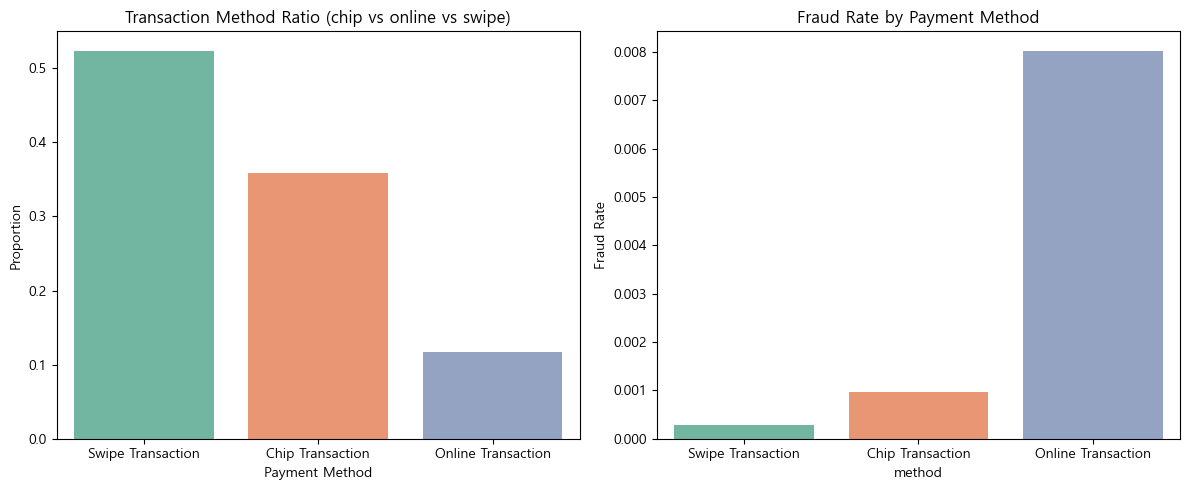

In [44]:
# 전체 거래 기준 각 거래 방식의 비율
method_ratio = work_with_target_pos.use_chip.value_counts(normalize=True)

# 비율 데이터프레임 변환
method_ratio_df = method_ratio.reset_index()
method_ratio_df.columns = ['method', 'ratio']

# 결제 방식별 fraud 비율 계산
fraud_ratio_by_payment = (
    work_with_target_pos
    .groupby('use_chip')['is_fraud']
    .mean()
    .reset_index()
    .rename(columns={'use_chip': 'method', 'is_fraud': 'fraud_rate'})
)

# 시각화
plt.figure(figsize=(12, 5))

order = ['Swipe Transaction', 'Chip Transaction', 'Online Transaction']

# 1. 전체 거래 기준 각 거래 방식 비율
plt.subplot(1, 2, 1)
sns.barplot(
    x='method', 
    y='ratio', 
    data=method_ratio_df, 
    palette='Set2',  
    order=order
)
plt.title('Transaction Method Ratio (chip vs online vs swipe)')
plt.xlabel('Payment Method')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

# 2. 결제 방식별 fraud 비율
plt.subplot(1, 2, 2)
sns.barplot(
    x='method', 
    y='fraud_rate', 
    data=fraud_ratio_by_payment, 
    order=order, 
    palette='Set2'
)
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Payment Method')
plt.xticks(rotation=0)

plt.tight_layout()

figure_name = 'payment_type_fraud_rate'
os.makedirs('figures', exist_ok=True)
plt.savefig(f'figures/{figure_name}')

plt.show()

- 온라인 거래에서 fraud일 확률이 높다 = 온라인 거래를 선호하는 사람일수록 사기거래에 노출될 위험이 크다.
- 고객당 거래방식 비율 집계를 통해 선호하는 거래 방식을 파악한다.

#### @@@@@@@@@@@@@@ Feature Engineering 시작점 @@@@@@@@@@@@@@@@@@@

In [45]:
# client_id 별 거래 방식 비율 집계
chip_ratios = (
    work_with_target_pos
    .groupby('client_id')['use_chip']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
).reset_index()

chip_ratios.columns.name = None  # 컬럼 레벨 이름 제거

# 컬럼명 변경
chip_ratios = chip_ratios.rename(
    columns={
        'Swipe Transaction': 'swipe_ratio',
        'Chip Transaction': 'chip_ratio',
        'Online Transaction': 'online_ratio'
    }
)

In [46]:
# chip_ratios merge
users_prep = pd.merge(
    users_with_fraud_count_pos, # 기본 유저 전처리 데이터에 병합
    chip_ratios,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

In [47]:
users_prep.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_count,fraud_risk,chip_ratio,online_ratio,swipe_ratio
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,9.0,1,0.230629,0.072421,0.696950
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5,21.0,1,0.436102,0.070288,0.493610
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,30.0,1,0.191800,0.419295,0.388905
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4,8.0,1,0.432900,0.094146,0.472954
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1,0.0,0,0.390890,0.139880,0.469230


In [48]:
users_prep = users_prep.dropna(subset='fraud_count')
users_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1219 non-null   int64  
 1   current_age        1219 non-null   int64  
 2   retirement_age     1219 non-null   int64  
 3   birth_year         1219 non-null   int64  
 4   birth_month        1219 non-null   int64  
 5   gender             1219 non-null   object 
 6   address            1219 non-null   object 
 7   latitude           1219 non-null   float64
 8   longitude          1219 non-null   float64
 9   per_capita_income  1219 non-null   int64  
 10  yearly_income      1219 non-null   int64  
 11  total_debt         1219 non-null   int64  
 12  credit_score       1219 non-null   int64  
 13  num_credit_cards   1219 non-null   int64  
 14  fraud_count        1219 non-null   float64
 15  fraud_risk         1219 non-null   int64  
 16  chip_ratio         1219 

- 가장 선호하는 또는 가장 불호하는 거래방식 추가

In [49]:
# 각 row마다 가장 큰/작은 ratio 찾기
def get_most_least(row):
    ratios = {
        'Chip Transaction': row['chip_ratio'],
        'Online Transaction': row['online_ratio'],
        'Swipe Transaction': row['swipe_ratio']
    }
    most = max(ratios, key=ratios.get).split()[0]   # 'Chip', 'Online', 'Swipe'
    least = min(ratios, key=ratios.get).split()[0]
    return pd.Series([most, least])

# 가장 선호하는 / 싫어하는 결제방식 추가
users_prep[['most_prefer','least_prefer']] = users_prep.apply(get_most_least, axis=1)

In [50]:
users_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1219 non-null   int64  
 1   current_age        1219 non-null   int64  
 2   retirement_age     1219 non-null   int64  
 3   birth_year         1219 non-null   int64  
 4   birth_month        1219 non-null   int64  
 5   gender             1219 non-null   object 
 6   address            1219 non-null   object 
 7   latitude           1219 non-null   float64
 8   longitude          1219 non-null   float64
 9   per_capita_income  1219 non-null   int64  
 10  yearly_income      1219 non-null   int64  
 11  total_debt         1219 non-null   int64  
 12  credit_score       1219 non-null   int64  
 13  num_credit_cards   1219 non-null   int64  
 14  fraud_count        1219 non-null   float64
 15  fraud_risk         1219 non-null   int64  
 16  chip_ratio         1219 

### 유저별 결제 금액 max/min/mean/median EDA 및 Feature Engineering

In [51]:
work_with_target_pos.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,num_credit_cards,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,5499,...,4,Mastercard,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,5311,...,5,Mastercard,Credit,2024-12-01,1,1,9100,2005-09-01,2015,0
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,4829,...,3,Mastercard,Debit,2020-05-01,1,1,14802,2006-01-01,2008,0
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,5813,...,2,Visa,Debit,2020-01-01,1,1,19113,2009-07-01,2014,0
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,5942,...,5,Mastercard,Debit (Prepaid),2014-03-01,1,1,89,2008-01-01,2015,0


- 유저별 카드 사용 기간이 모두 다를것이라 예상
- 금액의 최소값, 최대값, 카드사용횟수 등을 count로 사용하게 되면 왜곡 발생 가능
- 주별 평균 최소값, 주별 평균 최대값, 주별 평균 값, 주별 평균 중앙값, 주별 평균 사용횟수 형태로 정규화 필요하다고 판단.

In [52]:
def aggregate_amount_stats(df, freq='M'):
    """
    freq: 'W' (주 단위), 'M' (월 단위)
    """
    # 날짜 타입 보장
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df['period'] = df['date'].dt.to_period(freq).dt.start_time

    # 1단계: 주기 단위 집계
    grouped_stats = (
        df.groupby(['client_id', 'period'])['amount']
        .agg(
            min_amount=lambda x: x[x > 0].min(),
            max_amount='max',
            mean_amount='mean',
            median_amount='median',
            count_amount='count'
        )
        .reset_index()
    )

    # 2단계: client_id별 평균 집계
    avg_stats = (
        grouped_stats
        .groupby('client_id')[['min_amount','max_amount','mean_amount','median_amount','count_amount']]
        .mean()
        .reset_index()
    )

    # 컬럼명 주기 반영
    avg_stats = avg_stats.rename(columns={
        'min_amount': f'{freq}_avg_min_amount',
        'max_amount': f'{freq}_avg_max_amount',
        'mean_amount': f'{freq}_avg_mean_amount',
        'median_amount': f'{freq}_avg_median_amount',
        'count_amount': f'{freq}_avg_count_transaction'
    })

    return avg_stats

In [53]:
monthly_avg_amount_stats = aggregate_amount_stats(work_with_target_pos, 'M')
monthly_avg_amount_stats.head()

,client_id,M_avg_min_amount,M_avg_max_amount,M_avg_mean_amount,M_avg_median_amount,M_avg_count_transaction
0,0,2.528390,431.069492,49.308458,42.561314,73.271186
1,1,4.064153,235.128644,33.313047,16.283856,57.313559
2,2,0.970678,177.001271,27.443572,22.024534,59.847458
3,3,2.260593,134.749237,46.591208,50.487203,34.042373
4,4,1.729153,396.903136,39.824785,30.346441,84.932203


In [54]:
weekly_avg_amount_stats = aggregate_amount_stats(work_with_target_pos, 'W')
weekly_avg_amount_stats.head()

,client_id,W_avg_min_amount,W_avg_max_amount,W_avg_mean_amount,W_avg_median_amount,W_avg_count_transaction
0,0,5.282510,244.190875,49.711252,41.066187,16.821012
1,1,7.796362,131.352335,33.145009,17.906537,13.157588
2,2,4.781946,109.469708,27.529387,21.616362,13.739300
3,3,14.770819,85.948148,46.280753,48.432544,7.830409
4,4,2.770681,219.121770,40.015993,30.738220,19.498054


#### 실제 유저들의 카드 사용기간이 다른지 확인해보자.

In [55]:
# client_id별로 카드 사용기간, 고유 월(months) 수 계산
months_per_client = (
    work_with_target_pos
    .groupby('client_id')['month']
    .nunique()  # 고유 월 수
    .reset_index()
)

months_per_client.columns = ['client_id', 'num_months_used']
months_per_client['num_months_used'].value_counts().sort_index(ascending=True)

num_months_used
22        1
25        2
28        1
32        1
37        1
       ... 
114       6
115       6
116       3
117      15
118    1059
Name: count, Length: 67, dtype: int64

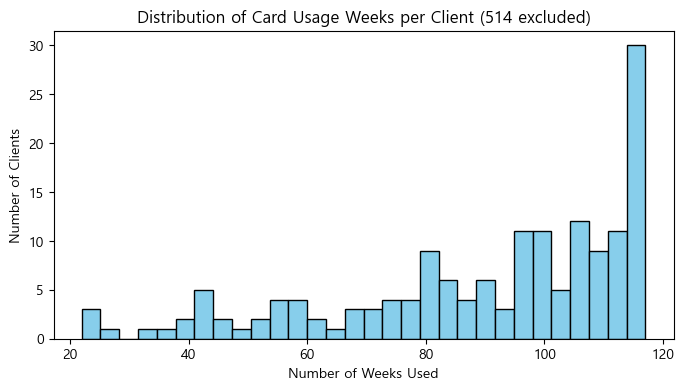

In [56]:
# 514주 제외.
filtered_months = months_per_client[months_per_client['num_months_used'] != 118]

plt.figure(figsize=(8,4))
plt.hist(filtered_months['num_months_used'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Weeks Used')
plt.ylabel('Number of Clients')
plt.title('Distribution of Card Usage Weeks per Client (514 excluded)')
plt.show()

- 22달부터 120달까지 다양한 카드 사용 기간 존재 확인
- 월별로 정규화 해주는 것은 옳은 판단이라고 판단됨

In [57]:
# Merge - weekly_avg_amount_stats 
users_prep = pd.merge(
    users_prep,
    weekly_avg_amount_stats,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

In [58]:
# Merge - monthly_avg_amount_stats 
users_prep = pd.merge(
    users_prep,
    monthly_avg_amount_stats,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

In [59]:
users_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1219 non-null   int64  
 1   current_age              1219 non-null   int64  
 2   retirement_age           1219 non-null   int64  
 3   birth_year               1219 non-null   int64  
 4   birth_month              1219 non-null   int64  
 5   gender                   1219 non-null   object 
 6   address                  1219 non-null   object 
 7   latitude                 1219 non-null   float64
 8   longitude                1219 non-null   float64
 9   per_capita_income        1219 non-null   int64  
 10  yearly_income            1219 non-null   int64  
 11  total_debt               1219 non-null   int64  
 12  credit_score             1219 non-null   int64  
 13  num_credit_cards         1219 non-null   int64  
 14  fraud_count             

In [60]:
# client_id + month별 unique merchant_id 집계
monthly_merchant_counts = (
    work_with_target_pos
    .groupby(['client_id', 'month'])['merchant_id']
    .nunique()   # 한 달 동안 거래한 서로 다른 merchant_id 수
    .reset_index()
    .rename(columns={'merchant_id': 'num_unique_merchants'})
)

# client_id별 월 평균 unique merchant 수 계산
monthly_unique_merchants_stats = (
    monthly_merchant_counts
    .groupby('client_id')['num_unique_merchants']
    .mean()
    .reset_index()
    .rename(columns={'num_unique_merchants': 'M_evg_unique_merchants'})
)

In [61]:
# Merge - monthly_unique_merchants_stats
users_prep = pd.merge(
    users_prep,
    monthly_unique_merchants_stats,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

In [62]:
users_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1219 non-null   int64  
 1   current_age              1219 non-null   int64  
 2   retirement_age           1219 non-null   int64  
 3   birth_year               1219 non-null   int64  
 4   birth_month              1219 non-null   int64  
 5   gender                   1219 non-null   object 
 6   address                  1219 non-null   object 
 7   latitude                 1219 non-null   float64
 8   longitude                1219 non-null   float64
 9   per_capita_income        1219 non-null   int64  
 10  yearly_income            1219 non-null   int64  
 11  total_debt               1219 non-null   int64  
 12  credit_score             1219 non-null   int64  
 13  num_credit_cards         1219 non-null   int64  
 14  fraud_count             

## 빈번 거래 탐지 - Jui

In [63]:
tx = transactions[["client_id","date"]].copy()
tx["date"] = pd.to_datetime(tx["date"], errors="coerce")
tx = tx.dropna().sort_values(["client_id","date"])

# 고객별 직전 거래까지의 시간차(초)
tx["gap_sec"] = tx.groupby("client_id")["date"].diff().dt.total_seconds()

# 각 고객의 전체 거래 간격의 중앙값(초)
gap_sec_median = (
    tx
    .groupby('client_id')['gap_sec']
    .median()  # 고유 월 수
    .reset_index()
    .rename(columns={'gap_sec': 'M_median_gap_sec'})
)

gap_sec_median

,client_id,M_median_gap_sec
0,0,15000.0
1,1,15540.0
2,2,19200.0
3,3,46740.0
4,4,11940.0
...,...,...
1214,1994,10200.0
1215,1995,20100.0
1216,1996,33060.0
1217,1997,20880.0


In [64]:
# gap_sec_median merge
users_prep = pd.merge(
    users_prep,
    gap_sec_median,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

In [65]:
# # 시기거래 위험도 구분 label 설정 (3등분)
# users_prep['fraud_risk'] = pd.cut(
#     users_prep['fraud_count'],
#     bins=[-1, 5, 11, float('inf')],  # 경계값 설정 (-1로 시작해서 0 포함)
#     labels=[0, 1, 2]
# )

# 시기거래 위험도 구분 label 설정 (2등분)
users_prep['fraud_risk'] = pd.cut(
    users_prep['fraud_count'],
    bins=[-1, 10, float('inf')],  # 경계값 설정 (-1로 시작해서 0 포함)
    labels=[0, 1]
)

In [66]:
users_prep[:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       15 non-null     int64   
 1   current_age              15 non-null     int64   
 2   retirement_age           15 non-null     int64   
 3   birth_year               15 non-null     int64   
 4   birth_month              15 non-null     int64   
 5   gender                   15 non-null     object  
 6   address                  15 non-null     object  
 7   latitude                 15 non-null     float64 
 8   longitude                15 non-null     float64 
 9   per_capita_income        15 non-null     int64   
 10  yearly_income            15 non-null     int64   
 11  total_debt               15 non-null     int64   
 12  credit_score             15 non-null     int64   
 13  num_credit_cards         15 non-null     int64   
 14  fraud_count 

In [67]:
users_prep.to_csv('users_prep_FE1.csv')

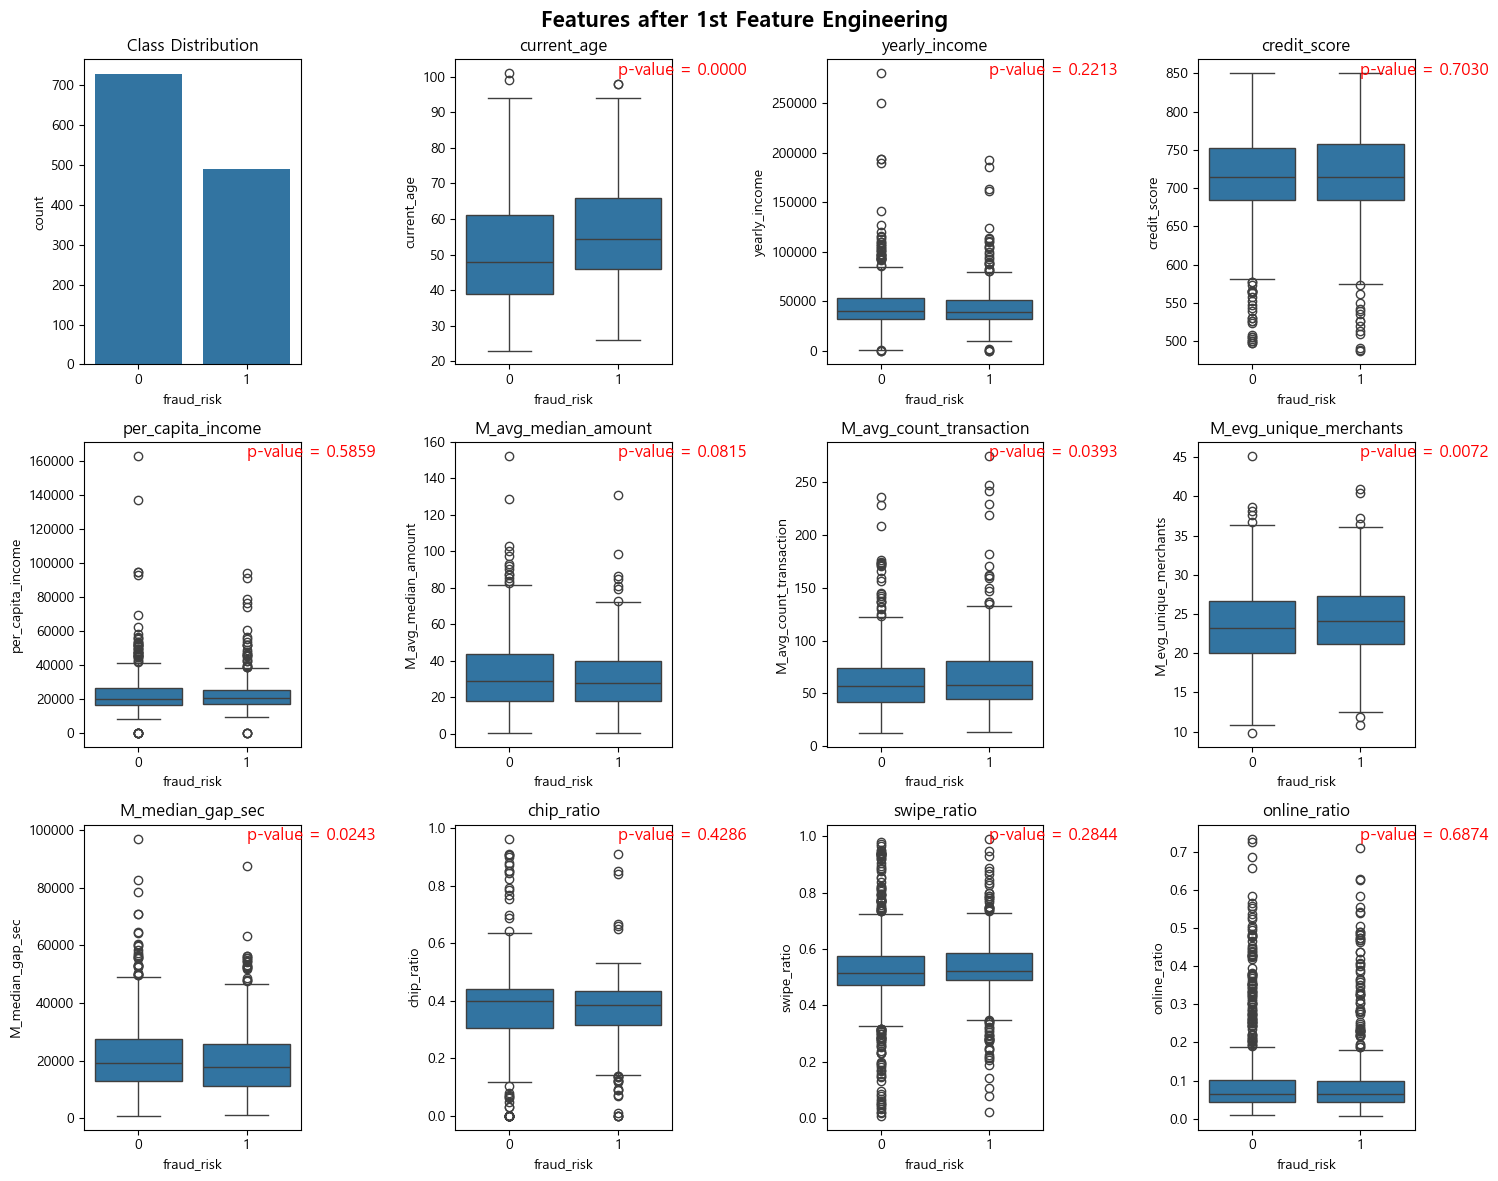

In [69]:
# 시각화 컬럼 선택
box_cols = ['fraud_risk', 'current_age', 'yearly_income', 'credit_score', 'per_capita_income', 'M_avg_median_amount', 'M_avg_count_transaction', 'M_evg_unique_merchants', 'M_median_gap_sec',
           'chip_ratio', 'swipe_ratio', 'online_ratio']

# subplot 배치 구조 정의
n_subplot_cols = 4
n_subplot_rows = math.ceil(len(box_cols) / n_subplot_cols)

# 전체 figure 크기
plt.figure(figsize=(15, 12))  

# 전체 제목 추가
plt.suptitle('Features after 1st Feature Engineering', fontsize=16, fontweight='bold')

# 1번째 subplot: fraud_risk countplot
plt.subplot(n_subplot_rows, n_subplot_cols, 1)
sns.countplot(x=box_cols[0], data=users_prep)
plt.title('Class Distribution')

# 나머지 subplot: boxplot
for i, col in enumerate(box_cols[1:], 2):  # 2번째 subplot부터
    plt.subplot(n_subplot_rows, n_subplot_cols, i)
    sns.boxplot(x='fraud_risk', y=col, data=users_prep)
    plt.title(f'{col}')
    
    # T-검정 수행
    group_0 = users_prep[users_prep['fraud_risk'] == 0][col]
    group_1 = users_prep[users_prep['fraud_risk'] == 1][col]
    
    t_stat, p_val = stats.ttest_ind(group_0, group_1, nan_policy='omit')  # T-검정 수행
    
    # p-value를 plot에 추가
    plt.annotate(f'p-value = {p_val:.4f}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=12, color='red')

plt.tight_layout()

# 이미지 저장
figure_name = 'features_vs_fraudRisk_with_pval.png'
os.makedirs('figures', exist_ok=True)
plt.savefig(f'figures/{figure_name}')

plt.show()

In [502]:
# fraud_risk가 null이 아닌 샘플만 선택
data = users_prep.dropna()

In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 0 to 1997
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            1219 non-null   int64   
 1   current_age                   1219 non-null   int64   
 2   retirement_age                1219 non-null   int64   
 3   birth_year                    1219 non-null   int64   
 4   birth_month                   1219 non-null   int64   
 5   gender                        1219 non-null   object  
 6   latitude                      1219 non-null   float64 
 7   longitude                     1219 non-null   float64 
 8   per_capita_income             1219 non-null   int64   
 9   yearly_income                 1219 non-null   int64   
 10  total_debt                    1219 non-null   int64   
 11  credit_score                  1219 non-null   int64   
 12  num_credit_cards              1219 non-null   int64  

In [504]:
data.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,...,W_avg_median_amount,W_avg_count_transaction,M_avg_min_amount,M_avg_max_amount,M_avg_mean_amount,M_avg_median_amount,M_avg_count_transaction,monthly_evg_unique_merchants,gap_sec,fraud_risk
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,...,71.547335,22.130350,2.589153,559.207627,80.417801,68.428941,96.398305,32.644068,18420.0,0
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,...,64.614815,10.881323,2.200085,686.285932,79.696503,66.091822,47.398305,28.025424,37530.0,1
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,...,31.666401,50.365759,0.978983,412.923729,33.051507,32.344788,219.389831,36.983051,7380.0,1
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,...,61.903687,16.889105,5.520763,1576.102458,125.770742,58.425551,73.567797,33.559322,20040.0,0
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,...,87.131060,17.951362,4.826525,817.697966,96.408370,87.651398,78.194915,36.466102,20160.0,0


In [505]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 데이터 전처리

In [525]:
# 학습 데이터 (예시)
X = data.drop(columns=['id', 'fraud_count', 'fraud_risk', 'birth_year', 'birth_month', 'longitude', 'latitude'])
y = data['fraud_risk']

In [526]:
X.head()

,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,chip_ratio,online_ratio,...,W_avg_mean_amount,W_avg_median_amount,W_avg_count_transaction,M_avg_min_amount,M_avg_max_amount,M_avg_mean_amount,M_avg_median_amount,M_avg_count_transaction,monthly_evg_unique_merchants,gap_sec
0,53,66,Female,29278,59696,127613,787,5,0.231560,0.074637,...,81.057181,71.547335,22.130350,2.589153,559.207627,80.417801,68.428941,96.398305,32.644068,18420.0
1,53,68,Female,37891,77254,191349,701,5,0.434114,0.072412,...,79.726211,64.614815,10.881323,2.200085,686.285932,79.696503,66.091822,47.398305,28.025424,37530.0
2,81,67,Female,22681,33483,196,698,5,0.190590,0.418456,...,33.045918,31.666401,50.365759,0.978983,412.923729,33.051507,32.344788,219.389831,36.983051,7380.0
3,63,63,Female,163145,249925,202328,722,4,0.429674,0.096417,...,126.519642,61.903687,16.889105,5.520763,1576.102458,125.770742,58.425551,73.567797,33.559322,20040.0
4,43,70,Male,53797,109687,183855,675,1,0.389509,0.146743,...,96.090390,87.131060,17.951362,4.826525,817.697966,96.408370,87.651398,78.194915,36.466102,20160.0


In [527]:
# 숫자형 / 범주형 컬럼 구분
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 전처리 컬럼 변환기
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

In [528]:
# 전체 파이프라인
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [529]:
# 전처리 적용
X_preprocessed = pipeline.fit_transform(X)

In [530]:
X_preprocessed.shape

(1219, 27)

In [531]:
# train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 모델 정의 및 훈련

In [532]:
def save_clf_reports(classifiers, file_name):
    reports = {}
    
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f'\n{name} Classification Report:')
        print(classification_report(y_test, y_pred))
        
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        reports[name] = pd.DataFrame(report_dict).transpose()
    
    # 하나의 CSV로 저장 (모델명 컬럼 추가)
    combined_df = pd.concat(reports, names=['Model', 'Metric'])

    # 결과 저장 경로 설정
    os.makedirs('./model_eval/', exist_ok=True)
    combined_df.to_csv(f'./model_eval/{file_name}')

In [533]:
# 사용할 분류기 정의
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(objective='multi:softmax', num_class=len(y.unique())),
    'LGBM': LGBMClassifier()
}

In [534]:
save_clf_reports(classifiers, 'classification_report_2.csv')


LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       146
           1       0.52      0.35      0.42        98

    accuracy                           0.61       244
   macro avg       0.58      0.57      0.56       244
weighted avg       0.59      0.61      0.59       244


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       146
           1       0.49      0.36      0.41        98

    accuracy                           0.59       244
   macro avg       0.56      0.56      0.55       244
weighted avg       0.58      0.59      0.58       244


GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       146
           1       0.51      0.40      0.45        98

    accuracy                           0.61       244
   macr

In [199]:
def plot_feature_importance(model, pipeline, top_n=20, title=None):
    """
    모델의 feature importance를 바차트로 시각화

    Parameters:
    - model: 학습된 모델 (RandomForest, XGBoost, LGBM 등)
    - pipeline: 전처리 pipeline 객체 (ColumnTransformer 포함)
    - top_n: 상위 n개 feature만 시각화
    - title: 그래프 제목 (없으면 모델 이름 사용)
    """
    # feature importance
    importances = model.feature_importances_
    feature_names = pipeline['preprocessor'].get_feature_names_out()
    
    # DataFrame 생성 및 정렬
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False)
    
    # 시각화
    plt.figure(figsize=(10,6))
    plt.barh(
        importance_df['feature'][:top_n][::-1],
        importance_df['importance'][:top_n][::-1]
    )
    plt.xlabel('Importance')
    plt.title(title if title else f'Top {top_n} Feature Importances - {type(model).__name__}')
    plt.show()
    
    return importance_df

# 추가 Feature engineering

## 카드 재발급이 많을수록 사기거래에 취약
- 카드 도난, 분실 등의 이유로
- 카드사용 기간대비 카드 발급 횟수 feature 추가 - 월 평균 보유 카드 재발급 빈도

In [448]:
users_prep = pd.read_csv('users_prep_FE1.csv', index_col=0)

In [449]:
cards.head()

,id,client_id,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
0,4524,825,Visa,Debit,2022-12-01,1,2,24295,2002-09-01,2008
1,2731,825,Visa,Debit,2020-12-01,1,2,21968,2014-04-01,2014
2,3701,825,Visa,Debit,2024-02-01,1,2,46414,2003-07-01,2004
3,42,825,Visa,Credit,2024-08-01,0,1,12400,2003-01-01,2012
4,4659,825,Mastercard,Debit (Prepaid),2009-03-01,1,1,28,2008-09-01,2009


In [450]:
cards.num_cards_issued.value_counts()

num_cards_issued
1    3114
2    2972
3      60
Name: count, dtype: int64

In [451]:
users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1


In [452]:
# 카드 사용 기간 정보를 추출
# 고객 + 카드별 월 수, 주 수를 동시에 계산
count_table = (
    transactions
    .groupby(['client_id', 'card_id'])
    .agg(
        unique_months=('month', 'nunique'),
        unique_weeks=('week', 'nunique')
    )
    .reset_index()
)

count_table.head()

,client_id,card_id,unique_months,unique_weeks
0,0,1271,105,457
1,0,4639,118,514
2,1,3682,52,222
3,1,4400,54,236
4,1,4652,118,514


In [453]:
# 카드 사용 기간(첫사용부터 마지막 사용까지)정보를 cards 데이터에 병합
cards_with_use_periods = pd.merge(cards, count_table, left_on=['id','client_id'], right_on=['card_id', 'client_id'])
cards_with_use_periods.drop(columns='card_id', inplace=True, errors='ignore')

In [454]:
# 카드 발급 횟수를 카드 사용 기간으로 나눠줌 (새컬럼 reissue_per_active_months 생성)
cards_with_use_periods['reissue_per_active_months'] = cards_with_use_periods['num_cards_issued']/cards_with_use_periods['unique_months']
cards_with_use_periods

,id,client_id,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,unique_months,unique_weeks,reissue_per_active_months
0,4524,825,Visa,Debit,2022-12-01,1,2,24295,2002-09-01,2008,118,509,0.016949
1,2731,825,Visa,Debit,2020-12-01,1,2,21968,2014-04-01,2014,67,288,0.029851
2,3701,825,Visa,Debit,2024-02-01,1,2,46414,2003-07-01,2004,118,502,0.016949
3,42,825,Visa,Credit,2024-08-01,0,1,12400,2003-01-01,2012,118,514,0.008475
4,1278,1746,Visa,Debit,2022-07-01,1,2,28508,2011-02-01,2011,105,436,0.019048
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,33,1944,Visa,Credit,2021-09-01,1,1,11100,2002-01-01,2009,118,513,0.008475
4067,1059,1944,Mastercard,Debit,2021-11-01,1,1,2468,2005-02-01,2005,118,512,0.008475
4068,4046,185,Mastercard,Debit,2024-07-01,1,1,16415,2016-07-01,2016,40,175,0.025000
4069,5361,185,Amex,Credit,2024-01-01,1,1,6900,2000-11-01,2013,118,509,0.008475


- 고객마다 가지고 있는 카드 수량이 다름
    - 많은 수량의 카드를 보유한 사람은 도난, 분실 등으로 인한 사기 거래 확률이 높다고 보았음.
- 하지만 이미 카드 수량 정보는 학습 데이터 feature로 존재 하므로 (num_credit_cards),
- reissue_per_active_months의 평균 집계 결정 (최초에는 합을 쓸까 고민해보았음)

In [455]:
# 고객 별 reissue_per_active_months의 합 집계 (고객마다 가지고있는 카드 수가 다르므로, 합보다는 
reissue_per_active_months = (
    cards_with_use_periods
    .groupby('client_id')['reissue_per_active_months']
    .mean()  # 평균
    .reset_index()
)

reissue_per_active_months

,client_id,reissue_per_active_months
0,0,0.013761
1,1,0.015408
2,2,0.017774
3,3,0.016537
4,4,0.016521
...,...,...
1214,1994,0.012004
1215,1995,0.016949
1216,1996,0.036252
1217,1997,0.017366


In [456]:
froud_count_per_cards = (
    work_with_target_pos
    .groupby(['client_id', 'card_id'])['is_fraud']
    .sum()
    .reset_index()
    .rename(columns={'is_fraud': 'fraud_counts'})
)
froud_count_per_cards

,client_id,card_id,fraud_counts
0,0,1271,2
1,0,4639,4
2,1,3682,0
3,1,4400,3
4,1,4652,9
...,...,...,...
4065,1997,5786,0
4066,1997,5808,2
4067,1998,1258,0
4068,1998,2160,5


In [457]:
cards_with_use_periods.head()

,id,client_id,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,unique_months,unique_weeks,reissue_per_active_months
0,4524,825,Visa,Debit,2022-12-01,1,2,24295,2002-09-01,2008,118,509,0.016949
1,2731,825,Visa,Debit,2020-12-01,1,2,21968,2014-04-01,2014,67,288,0.029851
2,3701,825,Visa,Debit,2024-02-01,1,2,46414,2003-07-01,2004,118,502,0.016949
3,42,825,Visa,Credit,2024-08-01,0,1,12400,2003-01-01,2012,118,514,0.008475
4,1278,1746,Visa,Debit,2022-07-01,1,2,28508,2011-02-01,2011,105,436,0.019048


In [458]:
froud_count_per_cards.head()

,client_id,card_id,fraud_counts
0,0,1271,2
1,0,4639,4
2,1,3682,0
3,1,4400,3
4,1,4652,9


### 카드 재발급 빈도와 카드 사기거래 발생 빈도의 상관관계

In [459]:
temp_card_data = pd.merge(cards_with_use_periods, froud_count_per_cards[['card_id', 'fraud_counts']], left_on='id', right_on='card_id').drop(columns=['card_id'], errors='ignore')
temp_card_data['M_avg_fraud_counts'] = temp_card_data['fraud_counts'] / temp_card_data['unique_months']
temp_card_data

,id,client_id,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,unique_months,unique_weeks,reissue_per_active_months,fraud_counts,M_avg_fraud_counts
0,4524,825,Visa,Debit,2022-12-01,1,2,24295,2002-09-01,2008,118,509,0.016949,6,0.050847
1,2731,825,Visa,Debit,2020-12-01,1,2,21968,2014-04-01,2014,67,288,0.029851,0,0.000000
2,3701,825,Visa,Debit,2024-02-01,1,2,46414,2003-07-01,2004,118,502,0.016949,2,0.016949
3,42,825,Visa,Credit,2024-08-01,0,1,12400,2003-01-01,2012,118,514,0.008475,1,0.008475
4,1278,1746,Visa,Debit,2022-07-01,1,2,28508,2011-02-01,2011,105,436,0.019048,8,0.076190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,33,1944,Visa,Credit,2021-09-01,1,1,11100,2002-01-01,2009,118,513,0.008475,0,0.000000
4066,1059,1944,Mastercard,Debit,2021-11-01,1,1,2468,2005-02-01,2005,118,512,0.008475,23,0.194915
4067,4046,185,Mastercard,Debit,2024-07-01,1,1,16415,2016-07-01,2016,40,175,0.025000,0,0.000000
4068,5361,185,Amex,Credit,2024-01-01,1,1,6900,2000-11-01,2013,118,509,0.008475,5,0.042373


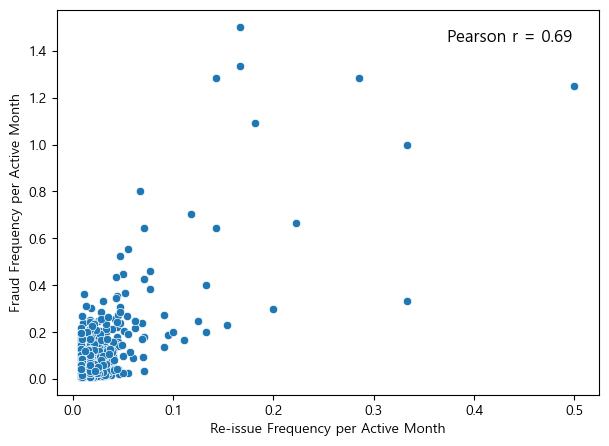

In [460]:
data =  temp_card_data[temp_card_data['M_avg_fraud_counts'] != 0]

x = data['reissue_per_active_months']
y = data['M_avg_fraud_counts']

# 피어슨 상관계수 계산
corr = np.corrcoef(x, y)[0, 1]

plt.figure(figsize=(7,5))
sns.scatterplot(x=x, y=y)

# 상관계수 텍스트 추가 (우측 상단)
plt.text(
    0.95, 0.95, f'Pearson r = {corr:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right'
)

plt.ylabel('Fraud Frequency per Active Month')
plt.xlabel('Re-issue Frequency per Active Month')

figure_name = 'cards_reissue_vs_fraud.png'
os.makedirs('figures', exist_ok=True)
plt.savefig(f'figures/{figure_name}')

plt.show()

#### 결론: 카드 잦은 재발급과 사기거래 연루는 양의 상관관계가 있다고 볼 수 있다 - 피쳐 추가 reissue_per_active_months

In [461]:
# Merge - reissue_per_active_months 
users_prep = pd.merge(
    users_prep,
    reissue_per_active_months,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

# 컬럼 재조정 target컬럼을 가장 마지막으로
cols = list(users_prep.columns)
cols.remove('fraud_risk')
cols.append('fraud_risk')

users_prep = users_prep[cols]

In [462]:
users_prep.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,...,W_avg_count_transaction,M_avg_min_amount,M_avg_max_amount,M_avg_mean_amount,M_avg_median_amount,M_avg_count_transaction,M_evg_unique_merchants,M_median_gap_sec,reissue_per_active_months,fraud_risk
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,14.990272,3.298390,465.111102,79.544715,67.929280,65.296610,27.059322,18420.0,0.018056,0
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,...,7.307393,3.688559,593.691949,81.242349,65.892881,31.830508,21.584746,37530.0,0.015579,1
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,...,33.737354,1.066356,356.570339,33.111753,32.019322,146.957627,31.483051,7380.0,0.036460,1
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,...,11.365759,7.604322,1329.112797,125.645804,58.575805,49.508475,27.118644,20040.0,0.015811,0
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,...,12.044747,6.108305,699.341271,97.374157,87.672246,52.466102,29.584746,20160.0,0.008475,0


In [463]:
users_prep.columns

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'fraud_count', 'chip_ratio', 'online_ratio', 'swipe_ratio',
       'most_prefer', 'least_prefer', 'W_avg_min_amount', 'W_avg_max_amount',
       'W_avg_mean_amount', 'W_avg_median_amount', 'W_avg_count_transaction',
       'M_avg_min_amount', 'M_avg_max_amount', 'M_avg_mean_amount',
       'M_avg_median_amount', 'M_avg_count_transaction',
       'M_evg_unique_merchants', 'M_median_gap_sec',
       'reissue_per_active_months', 'fraud_risk'],
      dtype='object')

## 카드 계좌 개설 후 첫 사기까지 걸린 시간 (재발 방지의 의미도 포함하는 정보)
- 카드를 개설한 후 사기 거래에 사용된 기간이 빠를수록 재발할 확률이 높을것이라는 가정.
- 소지한 카드 전체 중 개설 후 사기거래에 사용된 기간이 가장 빠른 하나를 대표값으로 입력.

In [464]:
users_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1219 non-null   int64  
 1   current_age                1219 non-null   int64  
 2   retirement_age             1219 non-null   int64  
 3   birth_year                 1219 non-null   int64  
 4   birth_month                1219 non-null   int64  
 5   gender                     1219 non-null   object 
 6   address                    1219 non-null   object 
 7   latitude                   1219 non-null   float64
 8   longitude                  1219 non-null   float64
 9   per_capita_income          1219 non-null   int64  
 10  yearly_income              1219 non-null   int64  
 11  total_debt                 1219 non-null   int64  
 12  credit_score               1219 non-null   int64  
 13  num_credit_cards           1219 non-null   int64

In [465]:
work_with_target_pos.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud,years_since_last_pin_change
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,5499,...,Mastercard,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0,11
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,5311,...,Mastercard,Credit,2024-12-01,1,1,9100,2005-09-01,2015,0,4
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,4829,...,Mastercard,Debit,2020-05-01,1,1,14802,2006-01-01,2008,0,11
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,5813,...,Visa,Debit,2020-01-01,1,1,19113,2009-07-01,2014,0,5
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,5942,...,Mastercard,Debit (Prepaid),2014-03-01,1,1,89,2008-01-01,2015,0,4


In [466]:
# 고객-카드별 최초 사기 거래 년-월
first_fraud_date = (
    work_with_target_pos[work_with_target_pos['is_fraud'] == 1]
    .groupby(['client_id', 'card_id'])['date']
    .min()
    .dt.date  # 시, 분, 초 제거
    .reset_index(name='first_fraud_date')
    .rename(columns={'client_id': 'client_id_x'})
)
first_fraud_date

,client_id_x,card_id,first_fraud_date
0,0,1271,2016-09-25
1,0,4639,2015-10-30
2,1,4400,2016-11-20
3,1,4652,2019-09-03
4,2,2576,2016-09-13
...,...,...,...
2052,1996,4212,2016-07-07
2053,1996,4744,2010-01-29
2054,1997,3343,2019-05-07
2055,1997,5808,2016-10-09


In [467]:
cards_with_first_fraud = pd.merge(cards, first_fraud_date, left_on=['id','client_id'], right_on=['card_id', 'client_id_x'])
cards_with_first_fraud.drop(columns=['card_id', 'client_id_x'], inplace=True, errors='ignore')

In [468]:
# datetime으로 변환 (이미 되어있다면 생략 가능)
cards_with_first_fraud['acct_open_date'] = pd.to_datetime(cards_with_first_fraud['acct_open_date'])
cards_with_first_fraud['first_fraud_date'] = pd.to_datetime(cards_with_first_fraud['first_fraud_date'])

# 일 단위 차이
cards_with_first_fraud['days_to_first_fraud'] = (
    cards_with_first_fraud['first_fraud_date'] - cards_with_first_fraud['acct_open_date']
).dt.days

In [469]:
min_days_until_fraud = (
    cards_with_first_fraud
    .groupby(['client_id'])['days_to_first_fraud']
    .min()
    .reset_index()
    .rename(columns={'days_to_first_fraud': 'min_days_until_fraud'})
)

min_days_until_fraud

,client_id,min_days_until_fraud
0,0,2063
1,1,1572
2,2,3087
3,3,1174
4,4,342
...,...,...
1188,1994,330
1189,1995,1220
1190,1996,150
1191,1997,4330


In [470]:
cards_with_first_fraud

,id,client_id,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,first_fraud_date,days_to_first_fraud
0,4524,825,Visa,Debit,2022-12-01,1,2,24295,2002-09-01,2008,2015-11-16,4824
1,3701,825,Visa,Debit,2024-02-01,1,2,46414,2003-07-01,2004,2016-03-06,4632
2,42,825,Visa,Credit,2024-08-01,0,1,12400,2003-01-01,2012,2016-02-23,4801
3,1278,1746,Visa,Debit,2022-07-01,1,2,28508,2011-02-01,2011,2016-06-09,1955
4,3754,1746,Mastercard,Debit (Prepaid),2023-02-01,1,1,99,2006-07-01,2012,2010-03-22,1360
...,...,...,...,...,...,...,...,...,...,...,...,...
2052,263,986,Visa,Debit,2012-08-01,1,2,27317,2010-01-01,2010,2010-08-22,233
2053,5295,1944,Mastercard,Debit,2018-06-01,0,2,19756,2014-10-01,2014,2016-10-16,746
2054,1059,1944,Mastercard,Debit,2021-11-01,1,1,2468,2005-02-01,2005,2014-02-08,3294
2055,5361,185,Amex,Credit,2024-01-01,1,1,6900,2000-11-01,2013,2018-06-21,6441


In [471]:
df_to_merge = cards_with_first_fraud[['id', 'days_to_first_fraud']].rename(columns={'id': 'card_id'})
temp_card_data = pd.merge(temp_card_data, df_to_merge, left_on='id', right_on='card_id')
temp_card_data.drop(columns='card_id', inplace=True, errors='ignore')

In [472]:
temp_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         2057 non-null   int64         
 1   client_id                  2057 non-null   int64         
 2   card_brand                 2057 non-null   object        
 3   card_type                  2057 non-null   object        
 4   expires                    2057 non-null   datetime64[ns]
 5   has_chip                   2057 non-null   Int8          
 6   num_cards_issued           2057 non-null   int64         
 7   credit_limit               2057 non-null   int64         
 8   acct_open_date             2057 non-null   datetime64[ns]
 9   year_pin_last_changed      2057 non-null   int64         
 10  unique_months              2057 non-null   int64         
 11  unique_weeks               2057 non-null   int64         
 12  reissu

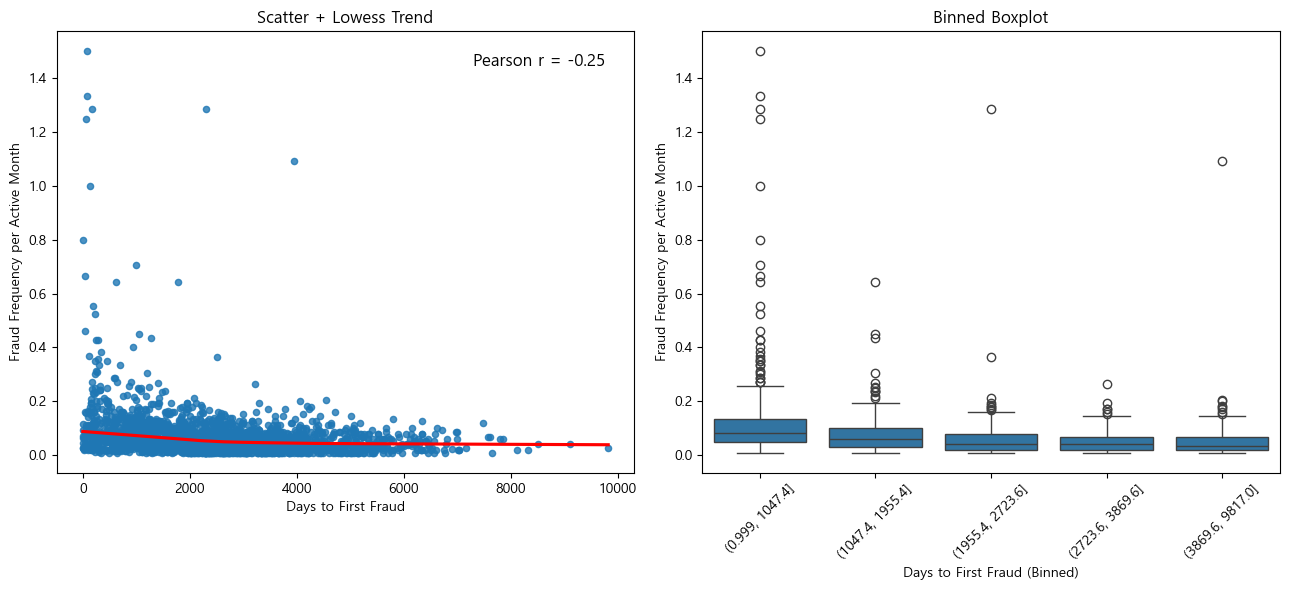

In [473]:
data = temp_card_data.copy()

x = data['days_to_first_fraud']
y = data['M_avg_fraud_counts']

# 피어슨 상관계수
corr = np.corrcoef(x, y)[0, 1]

# Boxplot을 위한 binning
data['days_bin'] = pd.qcut(data['days_to_first_fraud'], q=5)  # 5분위수 구간

plt.figure(figsize=(13,6))  # 1x3 subplot

# -------------------------
# 1. Scatter + Lowess Trend
# -------------------------
plt.subplot(1, 2, 1)
sns.regplot(x=x, y=y, lowess=True, scatter_kws={'s':20}, line_kws={'color':'red'})

plt.text(
    0.95, 0.95, f'Pearson r = {corr:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right'
)

plt.xlabel('Days to First Fraud')
plt.ylabel('Fraud Frequency per Active Month')
plt.title('Scatter + Lowess Trend')

# -------------------------
# 2. Boxplot by binned days
# -------------------------
plt.subplot(1, 2, 2)
sns.boxplot(x='days_bin', y='M_avg_fraud_counts', data=data)
plt.xticks(rotation=45)
plt.xlabel('Days to First Fraud (Binned)')
plt.ylabel('Fraud Frequency per Active Month')
plt.title('Binned Boxplot')

plt.tight_layout()

# -------------------------
# 저장
# -------------------------
figure_name = 'cards_first_fraud_comparison.png'
os.makedirs('figures', exist_ok=True)
plt.savefig(f'figures/{figure_name}', dpi=300)

plt.show()

#### 결론: 카드의 첫 사기 거래가 이른시간에 발생한 경우 더 많은 빈도로 사기거래가 반복되는 경향이 있다 - Feature 추가 min_days_until_fraud

In [474]:
# Merge - min_days_until_fraud 
users_prep = pd.merge(
    users_prep,
    min_days_until_fraud,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

# 컬럼 재조정 target컬럼을 가장 마지막으로
cols = list(users_prep.columns)
cols.remove('fraud_risk')
cols.append('fraud_risk')

users_prep = users_prep[cols]
users_prep.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,...,M_avg_min_amount,M_avg_max_amount,M_avg_mean_amount,M_avg_median_amount,M_avg_count_transaction,M_evg_unique_merchants,M_median_gap_sec,reissue_per_active_months,min_days_until_fraud,fraud_risk
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,3.298390,465.111102,79.544715,67.929280,65.296610,27.059322,18420.0,0.018056,4632.0,0
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,...,3.688559,593.691949,81.242349,65.892881,31.830508,21.584746,37530.0,0.015579,1360.0,1
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,...,1.066356,356.570339,33.111753,32.019322,146.957627,31.483051,7380.0,0.036460,1501.0,1
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,...,7.604322,1329.112797,125.645804,58.575805,49.508475,27.118644,20040.0,0.015811,32.0,0
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,...,6.108305,699.341271,97.374157,87.672246,52.466102,29.584746,20160.0,0.008475,NaN,0


In [475]:
users_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1219 non-null   int64  
 1   current_age                1219 non-null   int64  
 2   retirement_age             1219 non-null   int64  
 3   birth_year                 1219 non-null   int64  
 4   birth_month                1219 non-null   int64  
 5   gender                     1219 non-null   object 
 6   address                    1219 non-null   object 
 7   latitude                   1219 non-null   float64
 8   longitude                  1219 non-null   float64
 9   per_capita_income          1219 non-null   int64  
 10  yearly_income              1219 non-null   int64  
 11  total_debt                 1219 non-null   int64  
 12  credit_score               1219 non-null   int64  
 13  num_credit_cards           1219 non-null   int64

## 마지막 핀 번호 변경일이 너무 오래 된 경우
- 전체 데이터 중 가장 마지막 로그 기록의 date를 현재로 고려한다
- PIN번호를 오랫동안 바꾸지 않는 사람들은 사기거래에 취약 할 것이다.

In [476]:
work_with_target_pos.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud,years_since_last_pin_change
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,5499,...,Mastercard,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0,11
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,5311,...,Mastercard,Credit,2024-12-01,1,1,9100,2005-09-01,2015,0,4
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,4829,...,Mastercard,Debit,2020-05-01,1,1,14802,2006-01-01,2008,0,11
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,5813,...,Visa,Debit,2020-01-01,1,1,19113,2009-07-01,2014,0,5
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,5942,...,Mastercard,Debit (Prepaid),2014-03-01,1,1,89,2008-01-01,2015,0,4


In [477]:
# 가장 마지막 날의 연도 추출 - year_pin_last_changed 정보가 year로 되어있음
latest_year = work_with_target_pos.date.dt.year.max()

In [478]:
work_with_target_pos['years_since_last_pin_change'] = latest_year - work_with_target_pos['year_pin_last_changed']

In [479]:
work_with_target_pos.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,is_fraud,years_since_last_pin_change
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,5499,...,Mastercard,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0,11
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,5311,...,Mastercard,Credit,2024-12-01,1,1,9100,2005-09-01,2015,0,4
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,4829,...,Mastercard,Debit,2020-05-01,1,1,14802,2006-01-01,2008,0,11
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,5813,...,Visa,Debit,2020-01-01,1,1,19113,2009-07-01,2014,0,5
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,5942,...,Mastercard,Debit (Prepaid),2014-03-01,1,1,89,2008-01-01,2015,0,4


In [480]:
years_since_last_pin_change = (
    work_with_target_pos
    .groupby(['client_id', 'card_id'])['years_since_last_pin_change']
    .max()
    .reset_index()
    .rename(columns={'client_id': 'client_id_x'})
)
years_since_last_pin_change

,client_id_x,card_id,years_since_last_pin_change
0,0,1271,8
1,0,4639,5
2,1,3682,6
3,1,4400,7
4,1,4652,8
...,...,...,...
4065,1997,5786,10
4066,1997,5808,8
4067,1998,1258,8
4068,1998,2160,12


In [483]:
temp_card_data = pd.merge(
    temp_card_data,
    years_since_last_pin_change,
    left_on=['id', 'client_id'],
    right_on=['card_id', 'client_id_x'],
    how='left'
).drop(columns=['client_id_x', 'card_id'])

temp_card_data

,id,client_id,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,unique_months,unique_weeks,reissue_per_active_months,fraud_counts,M_avg_fraud_counts,days_to_first_fraud,years_since_last_pin_change
0,4524,825,Visa,Debit,2022-12-01,1,2,24295,2002-09-01,2008,118,509,0.016949,6,0.050847,4824,11
1,3701,825,Visa,Debit,2024-02-01,1,2,46414,2003-07-01,2004,118,502,0.016949,2,0.016949,4632,15
2,42,825,Visa,Credit,2024-08-01,0,1,12400,2003-01-01,2012,118,514,0.008475,1,0.008475,4801,7
3,1278,1746,Visa,Debit,2022-07-01,1,2,28508,2011-02-01,2011,105,436,0.019048,8,0.076190,1955,8
4,3754,1746,Mastercard,Debit (Prepaid),2023-02-01,1,1,99,2006-07-01,2012,116,313,0.008621,13,0.112069,1360,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,263,986,Visa,Debit,2012-08-01,1,2,27317,2010-01-01,2010,32,140,0.062500,8,0.250000,233,9
2053,5295,1944,Mastercard,Debit,2018-06-01,0,2,19756,2014-10-01,2014,45,191,0.044444,2,0.044444,746,5
2054,1059,1944,Mastercard,Debit,2021-11-01,1,1,2468,2005-02-01,2005,118,512,0.008475,23,0.194915,3294,14
2055,5361,185,Amex,Credit,2024-01-01,1,1,6900,2000-11-01,2013,118,509,0.008475,5,0.042373,6441,6


In [484]:
temp_card_data[temp_card_data.client_id.isin(non_fraud_ids)]

,id,client_id,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,unique_months,unique_weeks,reissue_per_active_months,fraud_counts,M_avg_fraud_counts,days_to_first_fraud,years_since_last_pin_change


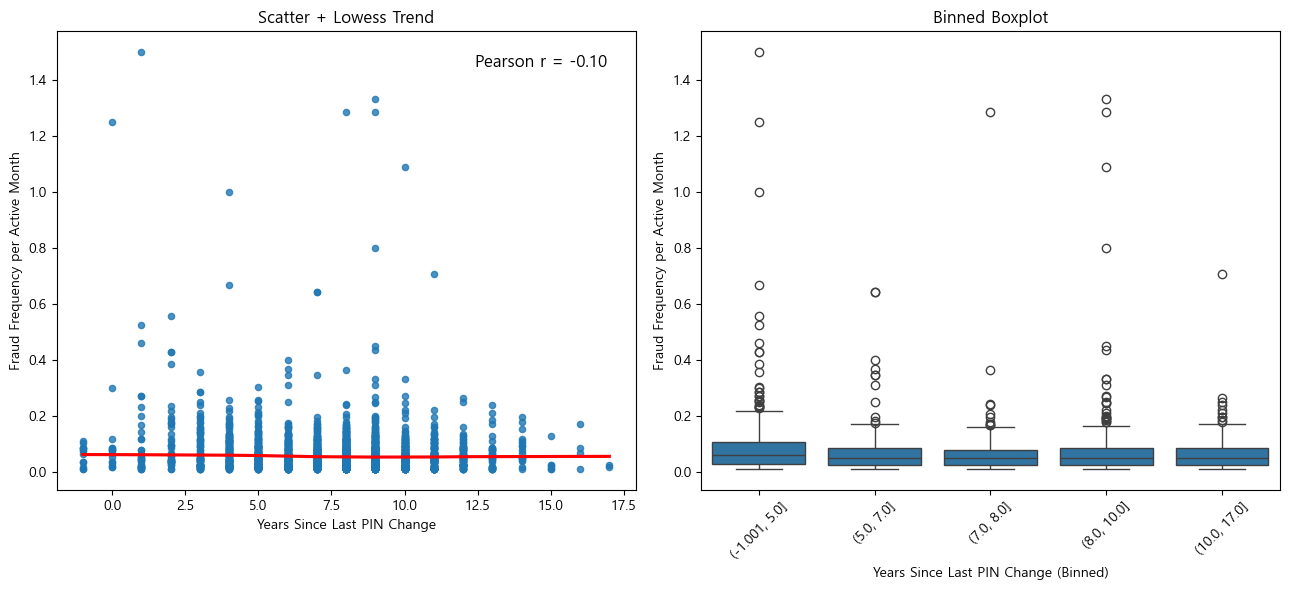

In [485]:
data = temp_card_data.copy()

x = data['years_since_last_pin_change']
y = data['M_avg_fraud_counts']

# 피어슨 상관계수
corr = np.corrcoef(x, y)[0, 1]

# Boxplot을 위한 binning
data['days_bin'] = pd.qcut(data['years_since_last_pin_change'], q=5)  # 5분위수 구간

plt.figure(figsize=(13,6))  # 1x3 subplot

# -------------------------
# 1. Scatter + Lowess Trend
# -------------------------
plt.subplot(1, 2, 1)
sns.regplot(x=x, y=y, lowess=True, scatter_kws={'s':20}, line_kws={'color':'red'})

plt.text(
    0.95, 0.95, f'Pearson r = {corr:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right'
)

plt.xlabel('Years Since Last PIN Change')
plt.ylabel('Fraud Frequency per Active Month')
plt.title('Scatter + Lowess Trend')

# -------------------------
# 2. Boxplot by binned days
# -------------------------
plt.subplot(1, 2, 2)
sns.boxplot(x='days_bin', y='M_avg_fraud_counts', data=data)
plt.xticks(rotation=45)
plt.xlabel('Years Since Last PIN Change (Binned)')
plt.ylabel('Fraud Frequency per Active Month')
plt.title('Binned Boxplot')

plt.tight_layout()

# -------------------------
# 저장
# -------------------------
figure_name = 'cards_PIN_fraud_comparison.png'
os.makedirs('figures', exist_ok=True)
plt.savefig(f'figures/{figure_name}', dpi=300)

plt.show()

#### 결론: 오히려 가장 최근 핀번호를 바꾼 경우 월간 사기거래 빈도가 다소 높은 경향 - 가정과 반대지만, 미비한 경향성이 존재 하므로 feature에 추가해보도록 함.

In [444]:
temp_card_data.head()

,id,client_id,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,unique_months,unique_weeks,reissue_per_active_months,fraud_counts,M_avg_fraud_counts,days_to_first_fraud,years_since_last_pin_change
0,4524,825,Visa,Debit,2022-12-01,1,2,24295,2002-09-01,2008,118,509,0.016949,6,0.050847,2681,11
1,2731,825,Visa,Debit,2020-12-01,1,2,21968,2014-04-01,2014,67,288,0.029851,0,0.000000,9,5
2,3701,825,Visa,Debit,2024-02-01,1,2,46414,2003-07-01,2004,118,502,0.016949,2,0.016949,2378,15
3,42,825,Visa,Credit,2024-08-01,0,1,12400,2003-01-01,2012,118,514,0.008475,1,0.008475,2557,7
4,1278,1746,Visa,Debit,2022-07-01,1,2,28508,2011-02-01,2011,105,436,0.019048,8,0.076190,1,8


In [488]:
max_years_since_last_pin_change = (
    years_since_last_pin_change
    .groupby(['client_id_x'])['years_since_last_pin_change']
    .max()
    .reset_index()
    .rename(columns={'years_since_last_pin_change': 'max_years_since_last_pin_change'})
)

max_years_since_last_pin_change

,client_id_x,max_years_since_last_pin_change
0,0,8
1,1,8
2,2,8
3,3,9
4,4,14
...,...,...
1214,1994,9
1215,1995,10
1216,1996,4
1217,1997,12


In [489]:
# Merge - max_years_since_last_pin_change 
users_prep = pd.merge(
    users_prep,
    max_years_since_last_pin_change,
    left_on='id',
    right_on='client_id_x',
    how='left'
).drop(columns=['client_id_x'])

# 컬럼 재조정 target컬럼을 가장 마지막으로
cols = list(users_prep.columns)
cols.remove('fraud_risk')
cols.append('fraud_risk')

users_prep = users_prep[cols]

In [493]:
users_prep['min_days_until_fraud'].fillna(users_prep['min_days_until_fraud'].max()*1.5, inplace=True)

In [497]:
users_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1219 non-null   int64  
 1   current_age                      1219 non-null   int64  
 2   retirement_age                   1219 non-null   int64  
 3   birth_year                       1219 non-null   int64  
 4   birth_month                      1219 non-null   int64  
 5   gender                           1219 non-null   object 
 6   address                          1219 non-null   object 
 7   latitude                         1219 non-null   float64
 8   longitude                        1219 non-null   float64
 9   per_capita_income                1219 non-null   int64  
 10  yearly_income                    1219 non-null   int64  
 11  total_debt                       1219 non-null   int64  
 12  credit_score        

In [496]:
users_prep.to_csv('users_prep_FE2.csv')